<B>Projrct on Recommendation system submitted by Akhilesh Razdan

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
import seaborn as sns

In [2]:
#reading data from csv
dataframe1 = pd.read_csv("phone_user_review_file_1.csv")
dataframe2 = pd.read_csv("phone_user_review_file_2.csv")
dataframe3 = pd.read_csv("phone_user_review_file_3.csv")
dataframe4 = pd.read_csv("phone_user_review_file_4.csv")
dataframe5 = pd.read_csv("phone_user_review_file_5.csv")
dataframe6 = pd.read_csv("phone_user_review_file_6.csv")
#Displaying data read in csv
dataframe1.head(3)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."


In [3]:
dataframe2.head(3)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [4]:
dataframe3.head(3)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versões mel...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...


In [5]:
dataframe4.head(3)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [6]:
dataframe5.head(3)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616


In [7]:
dataframe6.head(3)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800


In [8]:
dataframe=pd.concat((dataframe1, dataframe2, dataframe3, dataframe4, dataframe5, dataframe6), axis=0, sort=False)
dataframe.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [9]:
dataframe.shape

(1415133, 11)

In [10]:
dataframe.source.unique()

array(['Verizon Wireless', 'Phone Arena', 'Amazon', 'Samsung', 'Very',
       'CNET', 'Wireless AT&T', 'Littlewoods', 'Bit.au', 'Smartprix',
       'Zap.il', 'Verkkokauppa', 'Ciao', 'Komplett.no', 'Coolblue',
       'Elkjøp', 'Tkat', 'Wehkamp', 'CZC', 'KIESKEURIG', 'Elgiganten',
       'Wisebuy', 'MPX', 'Phone House', 'Inet', 'Gigantti',
       'Komplett.se ', 'Zoom.br', 'LDLC', 'Walmart', 'Связной', 'Otzyvua',
       'Mobi Guru', 'Phone Scoop', 'HSN', 'Optus', 'Kabum', 'Samsung Fun',
       'Fnac', 'Meilleur Mobile', 'Prisjakt', 'Cissa Magazine', 'Yandex',
       'Ofertou', 'Pixmania', 'Balão da Informática', 'CDON', 'MVideo',
       'Irecommend', 'SmartPhoneShop', 'Hotline.ua', 'Alza',
       'RueDuCommerce', 'Centralpoint', 'Portable Gear', 'LesMobiles',
       'JB Hi-Fi', 'The Good Guys', 'John Lewis', 'Otto.de',
       'Vandenborre', 'Newegg', 'Staples', 'Overstock', "Sam's Club",
       'Target', 'Argos', 'B&H Photo', 'Costco', 'Rogers', 'PriceSpy',
       '91 Mobiles', 'Handtec'

In [11]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [12]:
dataframe.lang.unique()

array(['en', 'he', 'fi', 'it', 'no', 'nl', 'ru', 'cs', 'sv', 'es', 'pt',
       'fr', 'de', 'da', 'tr', 'pl', 'hu', 'ar', 'id', 'zh', 'ja', 'ko'],
      dtype=object)

In [13]:
dataframe["score"]=dataframe["score"].round()

In [14]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.008083,2.617634,0.0,7.0,9.0,10.0,10.0
score_max,1351644.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0


C:\Users\Akhilesh Razdan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='count'>

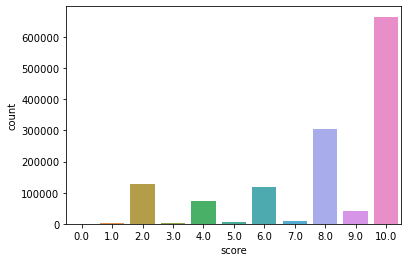

In [15]:
sns.countplot(dataframe['score'])

C:\Users\Akhilesh Razdan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

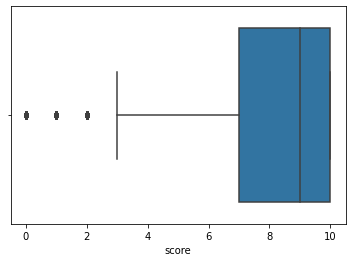

In [16]:
sns.boxplot(dataframe['score'])

Maximum scoring is in rage from 7-10

Outliers exist but when comapred to the total data set, they exist only in small quantities

In [17]:
dataframe.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [18]:
dataframe=dataframe.replace(r'^\s*$', np.NaN, regex=True)
dataframe=dataframe.replace(r'^\s�$', np.NaN, regex=True)
dataframe=dataframe.replace(r'^\s?$', np.NaN, regex=True)
dataframe=dataframe.drop(dataframe[dataframe['score'].isna()].index)
dataframe.fillna(dataframe['score_max'].median(), inplace=True)
dataframe=dataframe.dropna()
#dataframe=dataframe.drop(dataframe[dataframe['score_max'].isna()].index)
dataframe=dataframe.drop(dataframe[dataframe['extract'].isna()].index)
dataframe=dataframe.drop(dataframe[dataframe['author'].isna()].index)
dataframe=dataframe.drop(dataframe[dataframe['product'].isna()].index)

In [19]:
dataframe.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [20]:
dataframe.shape

(1156788, 11)

In [21]:
print(dataframe.duplicated().sum())
dataframe=dataframe.drop(dataframe[dataframe.duplicated(keep = 'last')].index)
print(dataframe.duplicated().sum())


4824
0


In [22]:
dataframe.shape

(1137178, 11)

In [23]:
df=dataframe.sample(n=1000000, random_state=612)

In [24]:
df.shape

(1000000, 11)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 110516 to 272986
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1000000 non-null  object 
 1   date       1000000 non-null  object 
 2   lang       1000000 non-null  object 
 3   country    1000000 non-null  object 
 4   source     1000000 non-null  object 
 5   domain     1000000 non-null  object 
 6   score      1000000 non-null  float64
 7   score_max  1000000 non-null  float64
 8   extract    1000000 non-null  object 
 9   author     1000000 non-null  object 
 10  product    1000000 non-null  object 
dtypes: float64(2), object(9)
memory usage: 91.6+ MB


In [26]:
df3=df.copy(deep = True)
df3.shape

(1000000, 11)

In [27]:
x=pd.Series(np.linspace(0,999999,1000000)).astype(int)
df3=df3.set_index(x)
df3['userid'] = df3.groupby(['author']).ngroup()
df3['productid'] = df3.groupby(['product']).ngroup()
df3['user_count']=df3['userid'].value_counts()
df3['product_count']=df3['productid'].value_counts()

<AxesSubplot:>

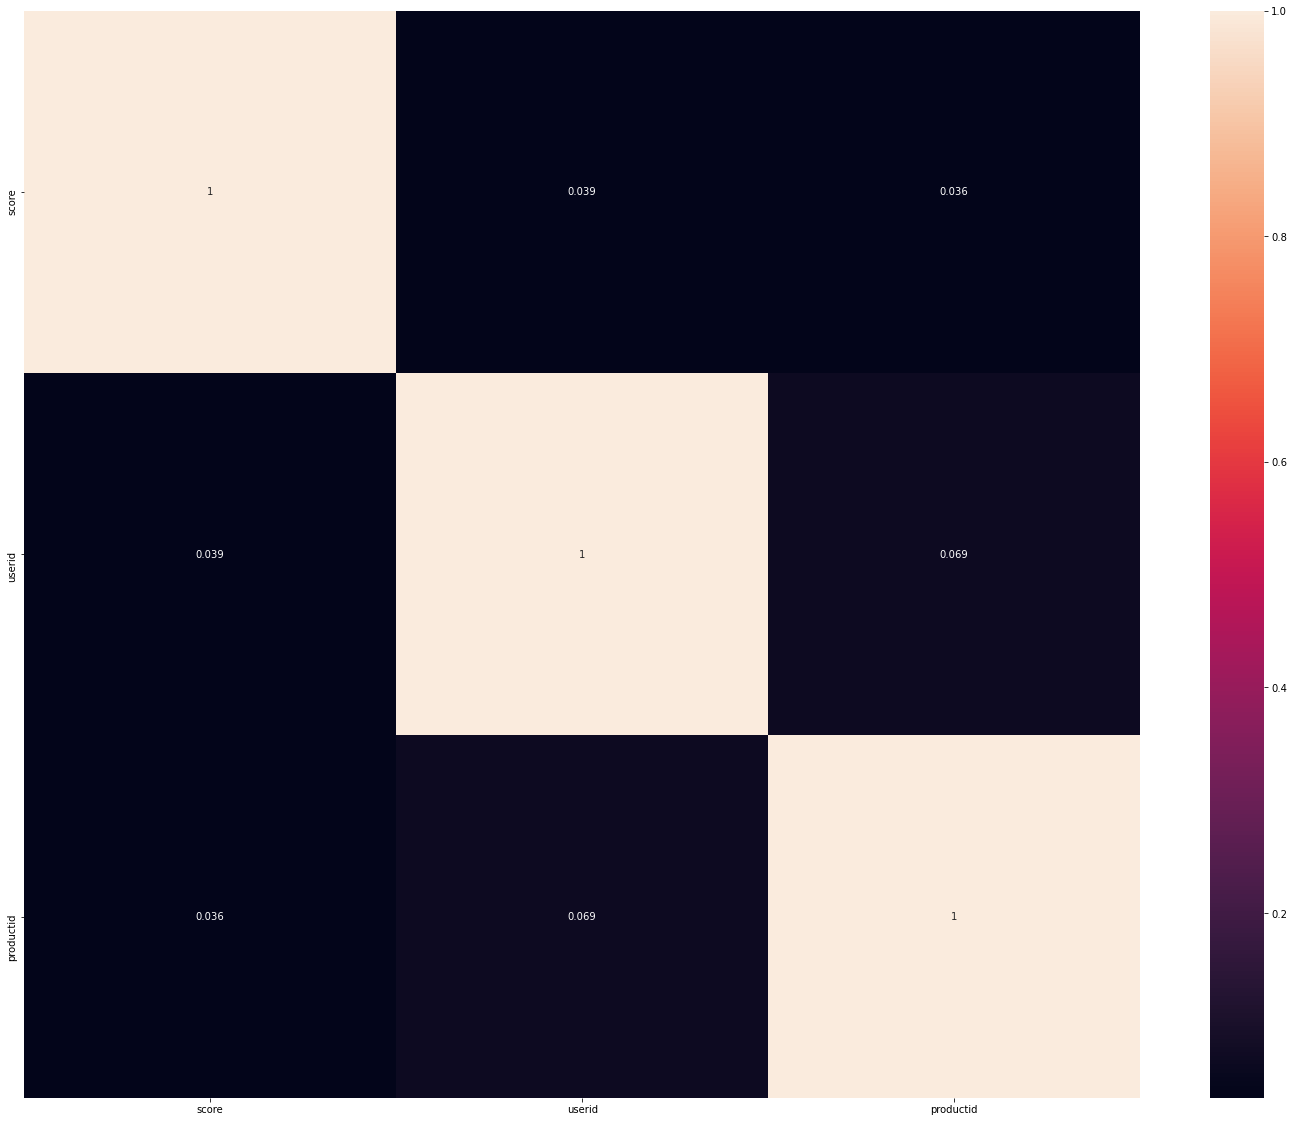

In [28]:
import matplotlib.pyplot as plt
df5=df3[['score','userid','productid']]
fig = plt.figure(figsize =(25,20))
sns.heatmap(df5.corr(), annot=True) 

eliminating irrelevant features

In [29]:
df=df.drop(['phone_url', 'score_max', 'date'], axis=1)
df.shape

(1000000, 8)

In [30]:
df2 = pd.DataFrame(df.groupby('author')['score'].count().sort_values(ascending=False))

In [31]:
print('The users with highest number of reviews')
df2.head(10)

The users with highest number of reviews


,score
author,
Amazon Customer,55799
10.0,44915
Cliente Amazon,14246
e-bit,6380
Client d'Amazon,5504
Amazon Kunde,3510
Anonymous,2124
einer Kundin,1868
einem Kunden,1337


No of users and products that have over 50 reviews

In [32]:
df3=df.copy(deep = True)
df3.shape

(1000000, 8)

In [33]:
df3.head()

,lang,country,source,domain,score,extract,author,product
110516,nl,nl,KIESKEURIG,kieskeurig.nl,9.0,Zoals gewoonlijk weer een top toestel van sams...,Robin Straub,Samsung Galaxy S6 wit / 32 GB
39975,ru,ru,Yandex,market.yandex.ru,8.0,Однозначно хороший телефон!!!,SuSu-22,Nokia E65
88399,en,us,HTC,htc.com,10.0,I like it very much... Realy Nice Phone. I rec...,haseebkhan7310,HTC Desire C
108267,no,no,Elkjøp,elkjop.no,10.0,En nydelig telefon. Det eneste jeg har å utset...,skjut,Samsung Galaxy S6 32GB smarttelefon (hvit)
101996,ru,ru,Yandex,market.yandex.ru,10.0,наконец-то научился выключать и убирать ненужн...,Мазаев Антон,Sony Xperia Z1 Compact


In [34]:
x=pd.Series(np.linspace(0,999999,1000000)).astype(int)
df3=df3.set_index(x)
df3['userid'] = df3.groupby(['author']).ngroup()
df3['productid'] = df3.groupby(['product']).ngroup()
df3['user_count']=df3['userid'].value_counts()
df3['product_count']=df3['productid'].value_counts()

In [35]:
df4=df3[ (df3['user_count']> 50) & (df3['product_count'] > 50)]

df4

,lang,country,source,domain,score,extract,author,product,userid,productid,user_count,product_count
2972,en,gb,Amazon,amazon.co.uk,8.0,I cannot gloat enough about how amazing the Ip...,liliane,Apple iPhone 6 16GB Silver UNLOCKED,485735,3780,66.0,71.0
12242,it,it,Amazon,amazon.it,10.0,"Ottimo telefono, consigliato!!! IL telefono in...",Cliente Amazon,"Meizu M2 Note Smartphone, Dual SIM, 16GB, Grig...",73212,20902,67.0,120.0
19058,en,gb,Amazon,amazon.co.uk,10.0,"The V220 is a durable little phone, it's very ...",Stev White,Motorola V220 - O2 Pay As You Go Mobile Phone ...,343227,24255,138.0,143.0
20130,en,us,Amazon,amazon.com,2.0,not happy with it a week after I received it s...,Amazon Customer,LG Env Touch VX11000 Touch Screen Cell Phone (...,22757,16622,52.0,519.0
23242,en,us,Amazon,amazon.com,10.0,"LOVE IT!!!! Love the white, the screen size is...",818 Mom,"Samsung Galaxy Note 4, Frosted White 32GB (Spr...",2463,36136,404.0,172.0
25445,de,de,Ciao,ciao.de,10.0,Da ich dieses Handy seit längerer Zeit mein Ei...,StefuziusGreen,HTC Hero,342355,11660,58.0,52.0
29807,en,in,Amazon,amazon.in,2.0,"used it for 6 months and it stopped working, a...",Sachin Sharma,XOLO Q900 (White),321376,49083,54.0,2865.0


In [36]:
print('Shape of dataframe consisting of products that have number of ratings greater than 50 and author who have reviewed more than 50 items:', df4.shape)

Shape of dataframe consisting of products that have number of ratings greater than 50 and author who have reviewed more than 50 items: (7, 12)


Popularity based recommender system <br>
Dropping all unnecessary features

In [37]:
df1=df[['score', 'extract','author','product']]
df2 = pd.DataFrame(df1.groupby('product')['score'].mean())
df2['rating_counts'] = pd.DataFrame(df1.groupby('product')['score'].count())

Top 5 products with highest ratings based on Popularity based recommender systems

In [38]:
df2.sort_values(['score','rating_counts'],ascending = [False, False])

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,164
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 Câmera 5MP 3G Wi-Fi Memória Interna 8G GPS,10.0,141
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi Câmera 5MP - Preto,10.0,136
Motorola Smartphone Motorola Novo Moto G DTV Colors Dual Chip XT 1069 Desbloqueado Android 4.4 Tela 5 16GB 3G Wi-Fi Câmera de 8MP - Preto,10.0,125
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip Câmera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e Memória 8GB,10.0,115
...,...,...
Sony Ericsson j120i,1.0,1
Sony Xperia Z 32 GB paars,1.0,1
T-Mobile LG Optimus F3Q,1.0,1


In [39]:
Top5Popular=df2.sort_values(['score','rating_counts'],ascending = [False, False])
Top5Popular.head(5)

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,164
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 Câmera 5MP 3G Wi-Fi Memória Interna 8G GPS,10.0,141
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi Câmera 5MP - Preto,10.0,136
Motorola Smartphone Motorola Novo Moto G DTV Colors Dual Chip XT 1069 Desbloqueado Android 4.4 Tela 5 16GB 3G Wi-Fi Câmera de 8MP - Preto,10.0,125
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip Câmera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e Memória 8GB,10.0,115


Collaborative Filtering recommender system

In [40]:
df2=df.copy(deep=True)
df2=df2[['author','product','score']]
df2.head()

,author,product,score
110516,Robin Straub,Samsung Galaxy S6 wit / 32 GB,9.0
39975,SuSu-22,Nokia E65,8.0
88399,haseebkhan7310,HTC Desire C,10.0
108267,skjut,Samsung Galaxy S6 32GB smarttelefon (hvit),10.0
101996,Мазаев Антон,Sony Xperia Z1 Compact,10.0


In [41]:
df2.shape

(1000000, 3)

Limiting the datasets to 5000 to avoid running out of memory issue

In [42]:
df2=df2.sample(n=5000,random_state=612)
x=pd.Series(np.linspace(0,4999,5000))
x=x.astype(int)
df2=df2.set_index([x])
df2[['score']]=df2[['score']].astype(int)
df2.head()

,author,product,score
0,Luigi,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",2
1,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",10
2,Joe,Elephone P8000 4G FDD-LTE Android 5.1 Smartpho...,10
3,Евгений,Мобильный телефон Lenovo Vibe P1m White (PA1G0...,8
4,dima2754,Apple iPhone 3GS 32Gb,10


In [43]:
df2['userid'] = df2.groupby(['author']).ngroup()
df2['productid'] = df2.groupby(['product']).ngroup()
print(df2['author'].value_counts())

Amazon Customer       263
10.0                  234
Cliente Amazon         71
Client d'Amazon        41
e-bit                  34
                     ... 
Alexandra               1
Василий Тэ              1
Jorge Gomez-Rangel      1
RedBull0at              1
Yannik                  1
Name: author, Length: 4169, dtype: int64


As we can see here only few users have rated many items and 90 percent of them have rated less than 5 items<br>


Format conversion and creating a collaborative filtering model<br>
Item-based recommender system

In [44]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df2[['author', 'product', 'score']], reader)
trainset, testset = train_test_split(data, test_size=.30)
algo1 = SVD()
algo1.fit(trainset)
test_pred = algo1.test(testset)
print("SVD-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD-based Model : Test Set
RMSE: 2.6461


2.6461045728551267

In [45]:
test_pred

[Prediction(uid='Franz Mayr', iid='Samsung Wave 723 S7230 Smartphone (8,1 cm (3,2 Zoll) Display, Touchscreen, 5 Megapixel Kamera) titan-gray', r_ui=10.0, est=7.968, details={'was_impossible': False}),
 Prediction(uid='Janice Iparraguirre De Castilhos', iid='Smartphone Motorola Novo Moto G DTV Colors, Dual Chip, 3G, 16GB - XT1069', r_ui=10.0, est=7.968, details={'was_impossible': False}),
 Prediction(uid='bodo kock', iid='Microsoft Nokia 6230i schwarz Handy', r_ui=8.0, est=7.968, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)', r_ui=2.0, est=7.249801089712997, details={'was_impossible': False}),
 Prediction(uid='qvdo', iid='Nokia X3 02.5 Téléphone Portable 50 Mo Métal', r_ui=8.0, est=7.639501146895102, details={'was_impossible': False}),
 Prediction(uid='Ankit Sharma', iid='Nokia Lumia 520 - Black', r_ui=10.0, est=7.968, details={'was_impossible': False}),
 Prediction(uid=10.0, iid='Nokia 2630', r_ui=8.0, est=7.8

In [46]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df2[['userid', 'productid', 'score']], reader)
trainset, testset = train_test_split(data, test_size=.30)
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [47]:
test_pred = algo.test(testset)
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 2.6969


2.696876590847955

In [48]:
test_pred

[Prediction(uid=457, iid=3033, r_ui=6.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=2041, iid=1129, r_ui=10.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=659, iid=2095, r_ui=10.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=700, iid=974, r_ui=8.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1988, iid=2581, r_ui=8.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=3123, iid=2739, r_ui=8.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1307, iid=2627, r_ui=10.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),


In [49]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)
test_pred = algo.test(testset)
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
User-based Model : Test Set
RMSE: 2.6841


2.684136006598822

In [50]:
test_pred

[Prediction(uid=457, iid=3033, r_ui=6.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=2041, iid=1129, r_ui=10.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=659, iid=2095, r_ui=10.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=700, iid=974, r_ui=8.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1988, iid=2581, r_ui=8.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=3123, iid=2739, r_ui=8.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1307, iid=2627, r_ui=10.0, est=7.9711428571428575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),


In [51]:
algo2=SVD()
cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5747  2.6142  2.6605  2.8213  2.5680  2.6478  0.0928  
MAE (testset)     1.9944  2.0606  2.0846  2.1977  2.0551  2.0785  0.0666  
Fit time          0.23    0.22    0.23    0.22    0.25    0.23    0.01    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([2.57470102, 2.61423016, 2.66054165, 2.821288  , 2.56800976]),
 'test_mae': array([1.99444403, 2.06064457, 2.08456934, 2.19773509, 2.05505326]),
 'fit_time': (0.22827649116516113,
  0.2164163589477539,
  0.23248720169067383,
  0.22450971603393555,
  0.24837017059326172),
 'test_time': (0.0039899349212646484,
  0.004989147186279297,
  0.004990577697753906,
  0.004986286163330078,
  0.003986835479736328)}

In [52]:
param_grid = {'n_epochs': [5, 10, 15, 20], 'lr_all': [0.002, 0.005, 0.007, 0.009, 0.01],
              'reg_all': [0.2, 0.4, 0.6, 0.8, 1.0]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)
print(gs.best_score['rmse'])

2.628055673233198


In [53]:
print(gs.best_params['rmse'])

{'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.8}


In [57]:
algo_final=SVD(n_epochs=10, lr_all=0.007, reg_all=0.4)
algo_final.fit(trainset)
test_pred = algo_final.test(testset)
print("SVD-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD-based Model : Test Set
RMSE: 2.6316


2.631627941730016

In [58]:
test_pred

[Prediction(uid=457, iid=3033, r_ui=6.0, est=7.9711428571428575, details={'was_impossible': False}),
 Prediction(uid=2041, iid=1129, r_ui=10.0, est=7.972466917320859, details={'was_impossible': False}),
 Prediction(uid=659, iid=2095, r_ui=10.0, est=7.9711428571428575, details={'was_impossible': False}),
 Prediction(uid=700, iid=974, r_ui=8.0, est=8.098704519002641, details={'was_impossible': False}),
 Prediction(uid=1988, iid=2581, r_ui=8.0, est=8.09519154611359, details={'was_impossible': False}),
 Prediction(uid=3123, iid=2739, r_ui=8.0, est=8.21216663367874, details={'was_impossible': False}),
 Prediction(uid=1307, iid=2627, r_ui=10.0, est=7.9711428571428575, details={'was_impossible': False}),
 Prediction(uid=170, iid=742, r_ui=4.0, est=7.584791205922454, details={'was_impossible': False}),
 Prediction(uid=1816, iid=3100, r_ui=6.0, est=7.9711428571428575, details={'was_impossible': False}),
 Prediction(uid=2922, iid=2850, r_ui=10.0, est=7.9711428571428575, details={'was_impossible'

In [59]:
cross_validate(algo_final, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    2.7017  2.6719  2.5832  2.6032  2.6148  2.5341  2.6382  2.6306  2.6731  2.6467  2.6297  0.0463  
MAE (testset)     2.0486  2.1005  2.0401  2.0518  2.0766  2.0389  2.0761  2.0832  2.0850  2.0730  2.0674  0.0200  
Fit time          0.13    0.13    0.14    0.13    0.13    0.13    0.14    0.14    0.13    0.14    0.13    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([2.70168527, 2.67188508, 2.58316014, 2.60322333, 2.61480795,
        2.53413253, 2.63821952, 2.63057136, 2.67314938, 2.64665654]),
 'test_mae': array([2.04860068, 2.10048376, 2.04013586, 2.05183031, 2.0765751 ,
        2.03892203, 2.07612859, 2.08315124, 2.08502484, 2.07297783]),
 'fit_time': (0.13463973999023438,
  0.12731027603149414,
  0.13763189315795898,
  0.13065052032470703,
  0.12765860557556152,
  0.13364243507385254,
  0.13563752174377441,
  0.1356370449066162,
  0.13164782524108887,
  0.14289307594299316),
 'test_time': (0.001994609832763672,
  0.0029921531677246094,
  0.0019948482513427734,
  0.001994609832763672,
  0.0029921531677246094,
  0.0029921531677246094,
  0.0029921531677246094,
  0.0019948482513427734,
  0.002991914749145508,
  0.0029921531677246094)}

Inference<BR>
Among all the three models of recommendation systems, SVD tends to have lower RMSE values when compared to collborative filtering based recommendation system. Both item_ based and user_based are suffering from cold start and grey sheep problem respectively. Though the original dataset is big, we had to select only 5000 data points to avoid running out of memory. This had impacted us directly.As been above earlier while checking how many different items each author has reviewed only few have reviewed multiple items while most of them have only rated only one item, this makes it much harder for collaborative filtering to recommend correctly and hence the high error and also most of the test predictions had was_impossible tag set True and only few were false. Well SVD too has a large RMSE value but it never had was_impossible tag: True on test predictions. In cases like these popularity based recommendation system is better.<BR>
    
    
Questions<BR>
    
Business scenarios where we can use popularity based recommendation system<BR>
When a new customer subscribe to our service we can use popularity based recommendation system. To recommend a particular product to a person previous data about them is necessary, it is the core product for recommendation systems. Since we don't have previous information about them we can use popularity based recommendation system which displays or recommends the latest prodructs that are in trend at that time. Initially this will work good till we gain some more insights about the preferences and tastes of the customer. This popularity recommendation systems doesn't need any information about the user.<BR>
    
    
Business scenarios where we can use collaborative filtering based recommendation system.<BR>
When we already have information on a set of customers, we can use collaborative filtering recommendation system. This system finds similarity between customers based on the products they have rated.<BR>
    
    
How to improve?<BR>
While using collaborative filtering methods, we tend to suffer from gray sheep and cold start problems, to avoid this it is better use a hybrid recommendation system to improve the recommendations<BR>